In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd



In [2]:
listings_ams=pd.read_csv('../data/cleaned/listings_ams3.csv', index_col=0)

In [3]:
pd.options.display.max_columns = None
listings_ams.shape

(6517, 32)

In [4]:
listings_ams.columns

Index(['name', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'instant_bookable', 'parking', 'cooking_basics',
       'dishwasher', 'tv', 'iron', 'private_patio_or_balcony', 'freezer',
       'dryer', 'private_entrance', 'microwave', 'self_check_in',
       'pets_allowed', 'bbq_grill'],
      dtype='object')

In [5]:
new_listings_ams = listings_ams.loc[:,['parking', 'cooking_basics',
       'dishwasher', 'tv', 'iron', 'private_patio_or_balcony', 'freezer',
       'dryer', 'private_entrance', 'microwave', 'self_check_in',
       'pets_allowed', 'bbq_grill', 'price']]

In [6]:
vert = pd.melt(new_listings_ams,'price')
vert

,price,variable,value
0,100.0,parking,0
1,59.0,parking,1
2,106.0,parking,1
3,140.0,parking,1
4,75.0,parking,0
...,...,...,...
84716,165.0,bbq_grill,1
84717,150.0,bbq_grill,0
84718,160.0,bbq_grill,0
84719,125.0,bbq_grill,0


In [7]:
listings_ams.groupby(['room_type']).agg({'price':np.average})
#AVERAGE

,price
room_type,
Entire home/apt,245.684751
Hotel room,163.291667
Private room,211.070048
Shared room,99.307692


In [8]:
vert.pivot_table(index='variable', columns='value', values='price', aggfunc={'price':np.average})
#AVERAGE


value,0,1
variable,,
bbq_grill,223.014756,307.134375
cooking_basics,206.416767,253.226462
dishwasher,225.097162,245.611298
dryer,238.028695,227.812911
freezer,224.475685,260.217762
iron,210.477956,246.411856
microwave,239.305987,230.569268
parking,216.409897,248.911525
pets_allowed,234.706476,240.605433


In [9]:
question2=vert.pivot_table(index='variable', columns='value', values='price', aggfunc={'price':np.median})
#MEDIAN

In [10]:
question2['difference']=question2[1]-question2[0]

In [11]:
question2

value,0,1,difference
variable,,,
bbq_grill,175.0,234.5,59.5
cooking_basics,155.0,200.0,45.0
dishwasher,155.0,204.0,49.0
dryer,180.0,190.0,10.0
freezer,169.0,218.0,49.0
iron,170.0,190.0,20.0
microwave,175.0,195.0,20.0
parking,180.0,185.0,5.0
pets_allowed,180.0,200.0,20.0


In [12]:
question2.to_csv('../data/cleaned/question2.csv')

In [13]:
listings_ams.groupby(['room_type']).agg({'price':np.median})
#MEDIAN

,price
room_type,
Entire home/apt,200.0
Hotel room,146.0
Private room,123.0
Shared room,50.0


In [14]:
#listings_ams['property_type'].unique()
listings_ams.groupby(['property_type']).agg({'price':np.median})

,price
property_type,
Barn,85.0
Boat,264.0
Bus,295.0
Camper/RV,91.0
Entire cabin,153.5
Entire chalet,120.0
Entire condo,225.0
Entire cottage,243.0
Entire guest suite,112.0


In [1]:
# pd.options.display.max_rows = None
# display(listings_ams.groupby(['neighbourhood_cleansed', 'room_type']).agg({'price':np.median}))


listings_ams.pivot_table(index='room_type', columns='neighbourhood_cleansed', values='price', aggfunc='median')

NameError: name 'listings_ams' is not defined

In [16]:
listings_ams.groupby(['property_type']).agg({'property_type':'count'})

,property_type
property_type,
Barn,1
Boat,79
Bus,1
Camper/RV,3
Entire cabin,4
Entire chalet,2
Entire condo,1265
Entire cottage,4
Entire guest suite,18


[(0.0, 2000.0), (0.0, 1000.0)]

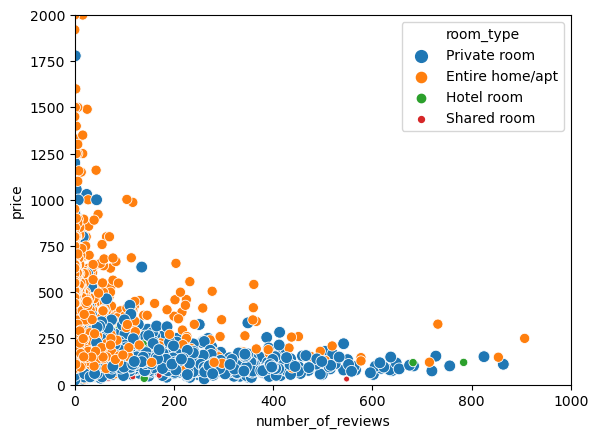

In [17]:

ax =sns.scatterplot(data=listings_ams, x='number_of_reviews', y='price', hue="room_type", size="room_type")
ax.set(ylim=(0, 2000), xlim=(0, 1000))

In [18]:
reviews=pd.read_csv('../data/cleaned/reviews.csv', index_col=0)

In [19]:
reviews=reviews.drop('host_id', axis=1)

In [20]:
listings_ams_all = pd.merge(listings_ams, reviews, left_index=True, right_index=True)
display(listings_ams_all.shape)
listings_ams_all.head()

(6517, 39)

,name,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,instant_bookable,parking,cooking_basics,dishwasher,tv,iron,private_patio_or_balcony,freezer,dryer,private_entrance,microwave,self_check_in,pets_allowed,bbq_grill,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Somewhere Else,2594559,f,t,Westerpark,52.39114,4.88846,Private room in boat,Private room,2,1.5 baths,1.0,"[""Bed linens"", ""Dishes and silverware"", ""Hange...",100.0,2,30,t,248,f,0,0,0,0,0,0,0,0,1,1,0,0,0,4.85,4.88,4.83,4.93,4.90,4.78,4.72
1,Quiet Garden View Room & Super Fast Wi-Fi,3159,t,t,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room in rental unit,Private room,2,1.5 shared baths,1.0,"[""Books and reading material"", ""Smoke alarm"", ...",59.0,3,28,t,314,f,1,0,0,0,1,0,0,0,1,0,0,0,0,4.89,4.93,4.99,4.97,4.98,4.69,4.81
2,Studio with private bathroom in the centre 1,59484,f,t,Centrum-Oost,52.36407,4.89393,Private room in townhouse,Private room,2,1 private bath,1.0,"[""Smoke alarm"", ""Bed linens"", ""Hangers"", ""Wifi...",106.0,1,365,t,339,t,1,0,0,1,0,0,0,0,0,0,0,0,0,4.44,4.69,4.79,4.63,4.62,4.87,4.49
3,"Romantic, stylish B&B houseboat in canal district",97647,t,t,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5 baths,1.0,"[""Books and reading material"", ""Smoke alarm"", ...",140.0,2,356,t,243,t,1,0,0,1,0,1,0,0,1,0,1,0,0,4.94,4.93,4.95,4.95,4.92,4.89,4.79
4,Comfortable double room,124245,t,t,Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,1 shared bath,1.0,"[""Smoke alarm"", ""Bed linens"", ""Lock on bedroom...",75.0,2,1825,t,454,f,0,0,0,0,1,0,0,1,1,0,0,0,0,4.88,4.93,4.89,4.95,4.94,4.97,4.83


In [21]:
listings_ams_all.to_csv('../data/cleaned/listings_ams_all.csv')

In [22]:
numerical=listings_ams_all.select_dtypes(np.number)

In [23]:
numerical

,host_id,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,parking,cooking_basics,dishwasher,tv,iron,private_patio_or_balcony,freezer,dryer,private_entrance,microwave,self_check_in,pets_allowed,bbq_grill,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2594559,52.391140,4.888460,2,1.0,100.0,2,30,248,0,0,0,0,0,0,0,0,1,1,0,0,0,4.85,4.88,4.83,4.93,4.90,4.78,4.72
1,3159,52.364350,4.943580,2,1.0,59.0,3,28,314,1,0,0,0,1,0,0,0,1,0,0,0,0,4.89,4.93,4.99,4.97,4.98,4.69,4.81
2,59484,52.364070,4.893930,2,1.0,106.0,1,365,339,1,0,0,1,0,0,0,0,0,0,0,0,0,4.44,4.69,4.79,4.63,4.62,4.87,4.49
3,97647,52.387610,4.891880,2,1.0,140.0,2,356,243,1,0,0,1,0,1,0,0,1,0,1,0,0,4.94,4.93,4.95,4.95,4.92,4.89,4.79
4,124245,52.367750,4.890920,2,1.0,75.0,2,1825,454,0,0,0,0,1,0,0,1,1,0,0,0,0,4.88,4.93,4.89,4.95,4.94,4.97,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,4184910,52.368637,4.899096,2,1.0,165.0,1,1125,343,0,1,0,1,1,1,0,0,0,1,0,1,1,4.76,4.83,4.64,4.86,4.71,4.93,4.59
6805,4215174,52.368840,4.861270,4,2.0,150.0,4,14,18,0,0,0,1,0,0,0,0,0,0,0,0,0,4.83,4.83,4.67,4.94,5.00,4.67,4.50
6806,1657181,52.352050,4.902670,3,2.0,160.0,3,1124,97,0,1,0,1,1,0,0,0,0,0,0,0,0,4.57,4.66,4.41,4.68,4.71,4.76,4.41
6807,4221960,52.364760,4.909250,2,1.0,125.0,1,30,1060,1,0,0,1,1,1,1,0,1,1,1,0,0,4.93,4.92,4.95,4.97,4.97,4.92,4.81


In [24]:
numerical2 = numerical.loc[:,['accommodates', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 
                             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']]

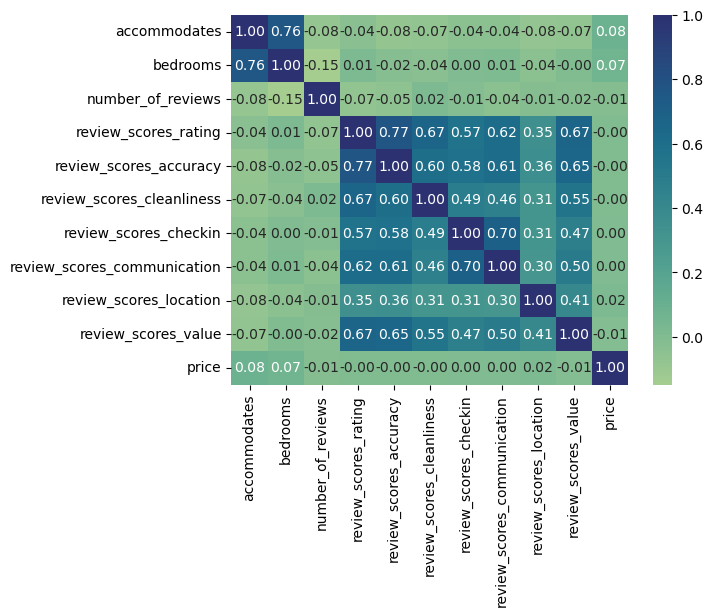

In [25]:
correlations_matrix = numerical2.corr()
sns.heatmap(correlations_matrix, annot=True, fmt=".2f", cmap="crest")
plt.show()

<AxesSubplot: xlabel='Count', ylabel='neighbourhood_cleansed'>

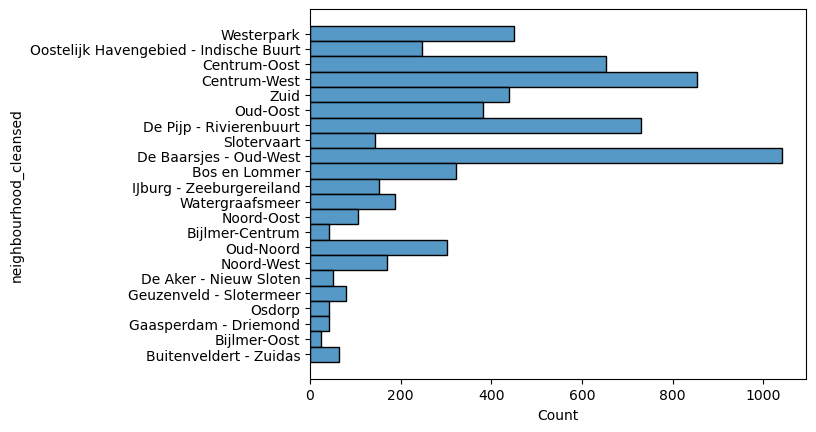

In [26]:
sns.histplot(data=listings_ams_all, y="neighbourhood_cleansed")


<AxesSubplot: xlabel='room_type', ylabel='Count'>

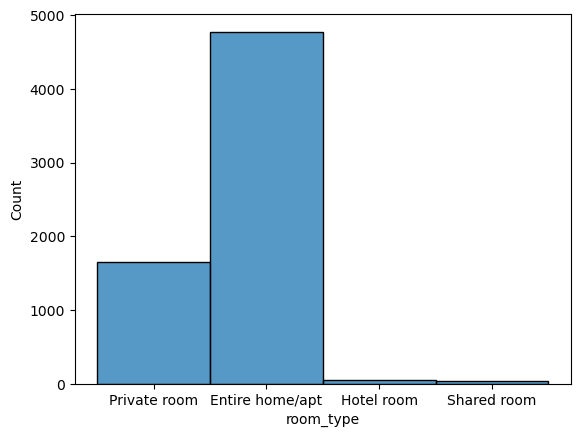

In [27]:
sns.histplot(data=listings_ams_all, x="room_type")

In [28]:
filter_price=listings_ams_all[listings_ams_all['room_type']=='Entire home/apt'].groupby(['neighbourhood_cleansed']).agg({'price':'median'}).sort_values(by=['neighbourhood_cleansed']).transpose().reset_index()
filter_price

neighbourhood_cleansed,index,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,Geuzenveld - Slotermeer,IJburg - Zeeburgereiland,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
0,price,135.0,180.0,177.5,190.0,250.0,260.0,165.0,200.0,229.0,135.0,162.5,227.0,177.5,169.0,175.0,180.0,190.0,191.0,177.0,199.5,195.0,225.0


In [29]:
geolocation = gpd.read_file('../data/raw/neighbourhoods.geojson')

In [30]:
geolocation=geolocation.sort_values(by=['neighbourhood'])
geolocation['median_price']=[135.0, 180.0, 77.5, 190.0, 250.0, 260.0, 165.0, 200.0, 229.0, 135.0, 162.5, 227.0, 177.5, 169.0, 175.0, 180.0, 190.0, 91.0, 177.0, 199.5, 195.0, 225.0]
geolocation

,neighbourhood,neighbourhood_group,geometry,median_price
12,Bijlmer-Centrum,None,"MULTIPOLYGON Z (((4.97184 52.28436 43.13905, 4...",135.0
0,Bijlmer-Oost,None,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",180.0
17,Bos en Lommer,None,"MULTIPOLYGON Z (((4.86496 52.38896 42.95433, 4...",77.5
15,Buitenveldert - Zuidas,None,"MULTIPOLYGON Z (((4.89907 52.33044 43.05777, 4...",190.0
7,Centrum-Oost,None,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",250.0
5,Centrum-West,None,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",260.0
21,De Aker - Nieuw Sloten,None,"MULTIPOLYGON Z (((4.84713 52.33690 43.04548, 4...",165.0
16,De Baarsjes - Oud-West,None,"MULTIPOLYGON Z (((4.88209 52.36205 43.00203, 4...",200.0
13,De Pijp - Rivierenbuurt,None,"MULTIPOLYGON Z (((4.91498 52.34215 43.03750, 4...",229.0
10,Gaasperdam - Driemond,None,"MULTIPOLYGON Z (((5.02154 52.30246 43.10781, 5...",135.0


<AxesSubplot: >

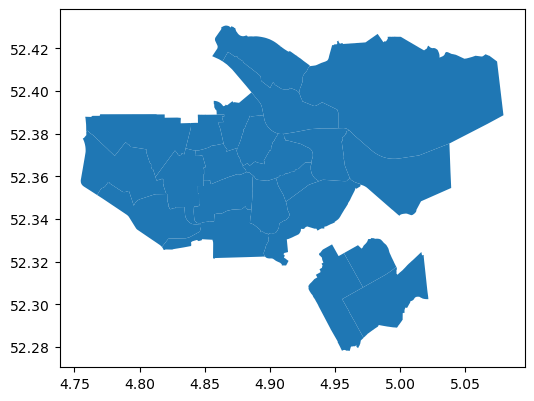

In [31]:
geolocation.plot(figsize=(6, 6))

(4.73862075, 5.09537825, 52.27054875, 52.438304249999995)

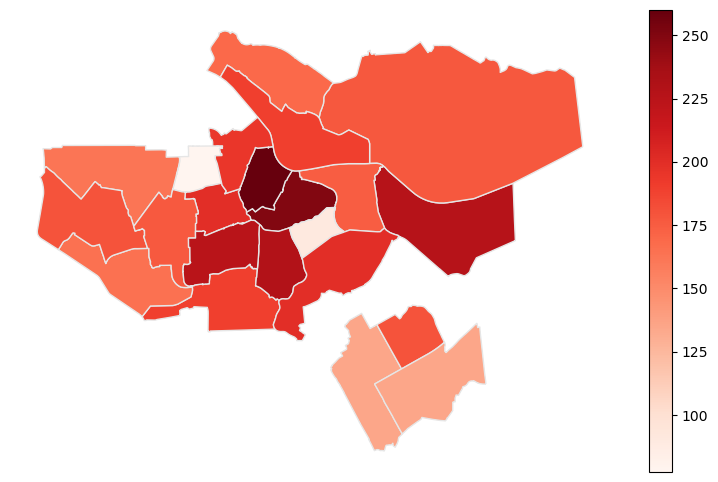

In [33]:
fig, ax = plt.subplots(1, figsize=(10,6))
geolocation.plot(column='median_price', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
